In [1]:
from DDPG import ddpg, ddpg_test
import tensorflow as tf
from utils import test_utils

Using Tensorflow  1.5.0


In [2]:
ddpg_test.ddpg_test()

[<tf.Variable 'Actor/network_kernel:0' shape=(128, 9) dtype=float32_ref>,
 <tf.Variable 'Actor/network_bias:0' shape=(9,) dtype=float32_ref>,
 <tf.Variable 'Actor/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'ActorTarget/network_kernel:0' shape=(128, 9) dtype=float32_ref>,
 <tf.Variable 'ActorTarget/network_bias:0' shape=(9,) dtype=float32_ref>,
 <tf.Variable 'ActorTarget/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'Critic/inputs_network_kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'Critic/actions_network_kernel:0' shape=(9, 1) dtype=float32_ref>,
 <tf.Variable 'Critic/network_bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'Critic/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'CriticTarget/inputs_network_kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/actions_network_kernel:0' shape=(9, 1) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/network_bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]




TESTING:	Actor



SSE: 0.00000000000	Action: True
SSE: 0.00000000000	Q: True
SSE: 0.00000000000	CriticGradients: True
SSE: 0.00000000007	ObjectiveGradients1: True
SSE: 0.00000000001	ObjectiveGradients2: True



TESTING:	TESTING: updating the model



SSE: 622223.06250000000	ActorParamsUpdate: True
SSE: 365221.68750000000	ActorParamsUpdate: True
SSE: 773298.06250000000	ActorParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000001	ActorParamsUpdate: True
SSE: 0.00000000000	ActorParamsUpdate: True
SSE: 0.00000000000	ActorParamsUpdate: True



TESTING:	Critic



SSE: 0.00000000000	Action: True
SSE: 0.00000000000	NextAction: True
SSE: 0.00000000000	Q: True
SSE: 0.00000000000	NextQ: True
SSE: 0.00000000000	TDTarget: True
SSE: 0.00000000000	CriticLoss: True



TESTING:	TESTING: updating the model



SSE: 20695.78710937500	CriticParamsUpdate: True
SSE: 2484.0610351

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from utils.test_utils import *

num_units = 128

T1 = np.random.normal(loc=np.ones([num_units]) * 150, scale=5)
T2 = np.random.normal(loc=np.ones([num_units]) * -150, scale=5)
T1_train = np.random.normal(loc=T1, scale=100)
T2_train = np.random.normal(loc=T2, scale=100)
mask = np.tanh(np.random.normal(size=num_units))
T1_val = np.random.normal(loc=((1-mask) * T1_train + mask * T2_train), scale=10)
T2_val = np.random.normal(loc=(mask * T1_train + (1-mask) * T2_train), scale=10)

In [2]:
np.round(mask, decimals=2)

array([ 0.06,  0.7 ,  0.47,  0.93,  0.01, -0.46,  0.17, -0.82, -0.69,
       -0.98, -0.99,  0.42, -0.6 , -0.81,  0.04, -0.93,  0.79,  0.8 ,
        0.98, -0.99, -0.48,  0.83, -0.63,  0.04, -0.42,  0.92, -0.33,
       -0.82,  0.58, -0.87,  0.93,  0.58,  0.37, -0.68, -0.89,  0.67,
       -0.36,  0.42,  0.33, -0.6 , -0.92, -0.96, -0.32, -0.29,  0.41,
        0.65, -0.86,  0.76, -0.33,  0.91, -0.11,  0.26, -0.74, -0.81,
       -0.19, -0.92, -0.19,  0.68, -0.8 , -0.  , -0.94, -0.41,  0.24,
       -0.5 , -0.15, -0.48, -0.24, -0.3 ,  0.82, -0.  , -0.75,  0.8 ,
       -0.96,  0.7 , -0.53, -0.03, -0.87, -0.99,  0.01,  0.86, -0.71,
       -0.9 , -0.08, -0.03,  0.85, -0.22, -0.91,  0.58, -0.07, -0.39,
       -0.53, -0.57, -0.94, -0.42, -0.56, -0.86, -0.63,  0.11, -0.57,
       -0.89, -0.45,  0.17,  0.81,  0.74,  0.92,  0.69,  0.77, -0.59,
       -0.71,  0.45, -0.29,  0.58,  0.77, -0.98, -0.65, -0.12,  0.39,
       -0.96, -0.79,  0.2 , -0.95, -0.95, -0.81,  0.66, -0.22, -0.19,
        0.15, -0.97]

In [3]:
P1 = Point(params=T1,
           params_train=T1_train,
           params_val=T1_val)

P2 = Point(params=T2,
           params_train=T2_train,
           params_val=T2_val)

env = Environment(P1, P2, 0.005)
# env.visualize()

In [ ]:
%matplotlib inline
# sharing both params
all_shared_best_vals = []
last_P1_train_loss = -1
last_P2_train_loss = -1
for log_coef in np.arange(-5, 5):
    env = Environment(P1, P2, 0.005)
    for time in range(1000):
        coefs = np.ones([num_units]) * np.exp(log_coef)
        P1_train_loss, P1_val_loss, state = env.update_P1(coefs)
        P2_train_loss, P2_val_loss, state = env.update_P2(coefs)
        
        if np.abs(P1_train_loss - last_P1_train_loss) < 1e-3:
            print("P1 Done")
            break
        if np.abs(P2_train_loss - last_P2_train_loss) < 1e-3:
            print("P2 Done")
            break
        last_P1_train_loss = P1_train_loss
        last_P2_train_loss = P2_train_loss
    
    # print("Final Val Loss \tP1: %.2f \tP2: %.2f" % (P1_val_loss, P2_val_loss))
    all_shared_best_vals.append(env.best_P2_valid_loss)
    # env.visualize()

In [ ]:
%matplotlib inline
from bandits import MultiArmedBanditSelector
selector = MultiArmedBanditSelector(
    num_actions=num_units, Q_initial=-5)
# initial task
task, _ = selector.sample()

selector_best_vals = []
last_P1_train_loss = -1
last_P2_train_loss = -1
for log_coef in np.arange(-5, 5):
    env = Environment(P1, P2, 0.005)
    for step in range(3000):
        coefs = (np.eye(num_units) * np.exp(log_coef))[task]
        
        P1_train_loss, P1_val_loss, state = env.update_P1(coefs)
        P2_train_loss, P2_val_loss, state = env.update_P2(coefs)
        
        if np.abs(P1_train_loss - last_P1_train_loss) < 1e-3:
            print("P1 Done")
            break
        # if np.abs(P2_train_loss - last_P2_train_loss) < 1e-3:
        #     print("P2 Done")
        #     break
        last_P1_train_loss = P1_train_loss
        last_P2_train_loss = P2_train_loss
        
        selector.update_Q_values(new_Q_value=-P1_val_loss/50000., index=task)
        
        
        task, _ = selector.sample(step=step)
    
    # print("Final Val Loss \tP1: %.2f \tP2: %.2f" % (P1_val_loss, P2_val_loss))
    # env.visualize()
    selector_best_vals.append(env.best_P1_valid_loss)

In [192]:
selector._Q_values

[Q_Entry(Value=-57.768156783453925, Count=203),
 Q_Entry(Value=-57.563802901108595, Count=218),
 Q_Entry(Value=-57.64388458833646, Count=235),
 Q_Entry(Value=-57.4184692823126, Count=225),
 Q_Entry(Value=-57.434968435843714, Count=249),
 Q_Entry(Value=-57.17446812940016, Count=236),
 Q_Entry(Value=-57.388384714679, Count=288),
 Q_Entry(Value=-57.63996281799298, Count=268),
 Q_Entry(Value=-57.539934554095005, Count=237),
 Q_Entry(Value=-57.54627099595901, Count=237),
 Q_Entry(Value=-57.34246234554226, Count=204),
 Q_Entry(Value=-57.439619001065786, Count=261),
 Q_Entry(Value=-57.322476680083554, Count=306),
 Q_Entry(Value=-57.587316176774124, Count=189),
 Q_Entry(Value=-57.52108755784493, Count=219),
 Q_Entry(Value=-57.464078505736715, Count=228),
 Q_Entry(Value=-57.61848715687593, Count=221),
 Q_Entry(Value=-57.81802694302526, Count=206),
 Q_Entry(Value=-57.5960360451981, Count=214),
 Q_Entry(Value=-57.83210708500212, Count=253),
 Q_Entry(Value=-57.77320148100019, Count=226),
 Q_Entry(

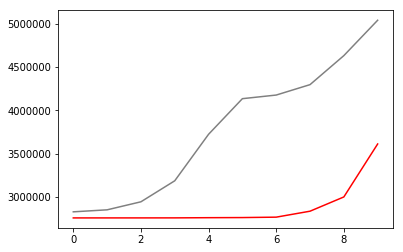

In [6]:
plt.plot(all_shared_best_vals, "grey")
plt.plot(selector_best_vals, c="red")

In [1]:
from DDPG.ddpg import SingleEpisodeDDPGController
from utils.test_utils import *

num_units = 5
num_actions = 3

T1 = np.random.normal(loc=np.ones([num_actions, num_units]) * 150, scale=5)
T2 = np.random.normal(loc=np.ones([num_actions, num_units]) * -150, scale=5)
T1_train = np.random.normal(loc=T1, scale=100)
T2_train = np.random.normal(loc=T2, scale=100)
mask = np.tanh(-np.random.normal(size=[num_actions, 1]))

T1_val = np.random.normal(loc=((1-mask) * T1_train + mask * T2_train), scale=10)
T2_val = np.random.normal(loc=(mask * T1_train + (1-mask) * T2_train), scale=10)

P1 = Point(params=T1,
           params_train=T1_train,
           params_val=T1_val)

P2 = Point(params=T2,
           params_train=T2_train,
           params_val=T2_val)

env = Environment(P1, P2, 0.005)

In [2]:
mask

array([[-0.82088334],
       [ 0.22019966],
       [ 0.28138055]])

In [3]:
from DDPG.ddpg import SingleEpisodeDDPGController
sess = tf.Session()
selector = SingleEpisodeDDPGController(
    sess=sess,
    num_units=num_units * num_actions * 3,  # [A, B, A-B]
    num_actions=num_actions,
    batch_size=64,
    learning_rate=0.01,
    tau=0.5,
    gamma=0.99,
    actor_activation=tf.nn.tanh,
    critic_activation=None,
    opitmizer_name="sgd",
    max_gradient_norm=1.0,
    actor_scope="Actor",
    critic_scope="Critic",
    actor_target_scope="ActorTarget",
    critic_target_scope="CriticTarget")

In [4]:
def state_processing(state):
    # length 3 of [num_actions, num_units]
    # [num_actions, 3 x num_units]
    processed_state = np.concatenate(state, axis=-1)
    # [1, num_actions x 3 x num_units]
    processed_state = np.reshape(processed_state, [1, -1])
    return processed_state
def action_processing(action):
    # [batch, num_actions] where batch=1
    # to [num_actions, 1]
    action = np.squeeze(action)
    action = np.expand_dims(action, axis=-1)
    return action


initial_state = state_processing(env.state())
display(initial_state.shape)
action = selector.act(initial_state)
action = action_processing(action)
display(action)

(1, 45)

array([[ 0.56369043],
       [-0.02673125],
       [-0.64761247]])

In [5]:
selector_best_vals = []
rewards_history = []
actions_history = []
for step in range(3000):
    # print(step)
    coefs = action_processing(action)
    P1_train_loss, P1_val_loss, _ = env.update_P1(coefs)
    P2_train_loss, P2_val_loss, _ = env.update_P2(coefs)
    
    
    new_state=state_processing(env.state())
    observed_reward = -np.log(P1_val_loss)
    action, debug = selector.update(
        new_state=new_state, observed_reward=observed_reward)
    
    rewards_history.append(observed_reward)
    actions_history.append(action)
    print(P1_val_loss)

13504.239380575778
13596.459466385626
13681.655961821214
13774.302895589806
13860.554610137224
13947.49442284609
14030.399026813759
14119.377719575165
14206.05150362523
14296.37526798777
14383.368860250315
14471.345588310998
14558.91078124621
14658.150871146916
14759.218762651251
14865.471406798326
14970.546858382366
15070.391083948158
15174.183528453425
15256.598543281707
15342.050358031996
15419.939336212507
15497.443279878042
15564.9674640575
15619.442103463894
15674.184955134451
15727.232405489838
15782.987981996868
15835.433134821005
15878.720597820471
15913.380501216352
15944.112867168367
15960.946446608754
15971.687502959325
15986.781040926975
16004.773373983726
16009.26378025098
16008.932597186787
16012.2268251329
16017.934479425096
16034.717163391997
16052.354117552675
16082.900794319266
16112.202059613539
16146.392963520522
16183.923611243803
16215.069060947875
16257.020333814038
16304.40389628938
16348.289805531946
16391.56537527646
16441.066681255506
16488.46812899956
16540

/Users/AlexGuo/Documents/Documents/UNC/DLResearches/TF-RLLibs/DDPG/ddpg.py:143: UserWarning: This Code Assumes No Termination of Episodes
  warnings.warn("This Code Assumes No Termination of Episodes")


18524.995819553453
18554.024136668468
18584.632812072938
18610.134663917404
18640.350983324417
18676.483855643924
18730.404973434823
18793.034667631546
18862.386620555688
18945.06728352088
19029.85119872698
19096.784428934832
19164.073683862825
19253.789171814653
19344.034002776883
19422.19563732189
19516.480267283798
19608.91063149705
19705.369175205764
19816.28253800149
19935.49274099874
20050.45051607037
20168.772192587727
20289.116822218068
20421.541129468264
20551.57671667578
20694.27881156951
20843.455261606097
20987.35031158874
21125.75814344362
21266.242408025264
21402.432169475826
21534.46801645468
21671.115210941854
21811.097312027847
21939.247634171665
22065.652673086817
22188.05916218286
22283.643407292082
22379.56757641715
22474.928655102638
22586.08330675774
22705.381922775738
22830.08680277752
22954.367248253584
23081.275863856292
23231.75887784409
23374.58323008552
23493.581614327813
23590.867337157404
23689.246709936055
23779.637504962404
23898.376185566987
24013.29569

5584243.805877695
5833398.219735998
6087698.844795838
6345850.037733819
6606727.08453269
6875162.422801624
7158963.138879697
7453602.79706611
7762850.21617357
8070987.536617427
8384164.795122462
8711911.437796416
9063719.191897277
9433201.343517302
9819081.119950056
10233567.688567407
10666162.236610366
11115814.336050194
11591880.257626956
12098252.016135404
12648787.249546833
13250663.842864348
13881251.038851252
14545159.026214356
15274442.590319628
16027547.25445561
16812646.780458175
17654615.719777662
18532863.250453033
19463856.680753052
20463072.27368521
21521771.36633002
22634767.42113445
23825091.786879517
25069859.73534819
26402997.202228
27760428.881647486
29186965.17597938
30674107.159901902
32231181.70290474
33848972.72884263
35502457.51301866
37230689.333156414
39091612.48591772
41004564.73846171
43103033.9389333
45358540.93487879
47819810.518781416
50374379.55926349
53145345.9869929
56069070.98564971
59087793.434296444
62254567.58600765
65622013.89170677
69157035.079544

364213825975088.1
381978467444316.25
400389971034014.6
420355565956351.7
442074532108003.0
465017102721967.2
488637277812834.25
513725343029679.2
540952960110462.1
568539745882328.6
598849838111749.6
630544537098086.2
662879129503267.8
697106497557856.5
732038905338651.2
767413568899971.1
804623169566272.8
843798716110187.6
886535512063384.2
930572581645659.8
976872747295080.8
1025739580155016.6
1077780459510754.8
1131796584612526.0
1187982415218581.5
1248172275827422.5
1312154469524464.0
1378868242062140.2
1450145874589461.0
1525455347415837.2
1604036847851096.5
1687554994667417.0
1777142052040853.5
1871950116402493.5
1970636154028306.5
2074491645137779.2
2187105874520817.0
2307678264787418.5
2439217249989259.0
2586127833072449.0
2741464035964967.5
2902120136943675.5
3068633824318877.5
3242699250286136.5
3422135361248215.0
3608435017276788.5
3806579823489809.0
4014447114255279.0
4246080595210569.5
4484605264465051.5
4743627684494439.0
5015996876433497.0
5305995872980912.0
561803390278

5.975830900096611e+22
6.240141781116949e+22
6.509314621570856e+22
6.786914701909636e+22
7.086545800818382e+22
7.407690212191083e+22
7.743180029565797e+22
8.095871740002495e+22
8.452800137206608e+22
8.8281504280267e+22
9.216808515125415e+22
9.611906888034614e+22
1.0016668036609537e+23
1.0430090994976006e+23
1.0852955518250605e+23
1.131164123023606e+23
1.1803576224130549e+23
1.2315824981909067e+23
1.2833077238099178e+23
1.337213789094544e+23
1.3938564858386215e+23
1.4559757306998936e+23
1.5222285718211617e+23
1.5908914390626434e+23
1.6592260656999318e+23
1.7310328774627157e+23
1.8049645496054312e+23
1.8809686110776065e+23
1.9592456549966417e+23
2.0421901873940637e+23
2.1263543414366665e+23
2.2143963245051894e+23
2.30784757069101e+23
2.402840647956225e+23
2.503058371821059e+23
2.6060334157487427e+23
2.7102028475285013e+23
2.8164787225596506e+23
2.9299594387709843e+23
3.046148818383132e+23
3.161864267173884e+23
3.284612962833636e+23
3.41025436874948e+23
3.5419365214039414e+23
3.67312249605

4.2586014108426135e+20
4.0130934544692406e+20
3.778376884025521e+20
3.562640753489005e+20
3.3619852489004915e+20
3.173796226489652e+20
2.9920301085741095e+20
2.8219195072147948e+20
2.6549750016466285e+20
2.4927392131019725e+20
2.3375384881708378e+20
2.1838963543530973e+20
2.037685979964907e+20
1.9008675016169082e+20
1.7713318026586354e+20
1.6547488304963715e+20
1.5429383869121623e+20
1.4387224739648458e+20
1.3390940384078658e+20
1.2449991764890318e+20
1.1593249212807329e+20
1.0817800175928012e+20
1.0058596405496549e+20
9.351092689743954e+19
8.684213286182982e+19
8.090666857428722e+19
7.531192837897291e+19
7.020572086620913e+19
6.546199955524849e+19
6.102167643886518e+19
5.690191998069065e+19
5.307440598849596e+19
4.943852908547393e+19
4.610737262631883e+19
4.299280763422045e+19
4.008555875852068e+19
3.74142233430361e+19
3.488784757838701e+19
3.2400916683608904e+19
3.006896691072412e+19
2.7915749555190477e+19
2.586371990729285e+19
2.397425917562143e+19
2.2166245441337033e+19
2.053646610

2466187482863008.0
2416924087045255.5
2368636510758556.5
2321317969876863.5
2274943531594337.0
2229499431381365.0
2184957684215803.2
2141304926625536.8
2098526667771749.0
2056608955001253.5
2015537775103433.5
1975283737971750.8
1935827373247639.2
1897157110619281.2
1859260566771397.0
1822121120766302.2
1785716989256841.2
1750028084287906.5
1715050199864470.8
1680771286133965.0
1647172926119021.5
1614245695403888.2
1581977296941375.5
1550365491240062.2
1519390400766623.5
1489032202356056.5
1459274117991908.5
1430112059793109.8
1401528448657700.5
1373514978146899.2
1346054218345169.5
1319147093484812.8
1292774454407814.2
1266927362374641.8
1241593387765617.5
1216763772241563.0
1192429976866525.2
1168581767716755.2
1145209803310127.2
1122303776075395.5
1099854177821588.0
1077853094787674.5
1056287647707422.5
1035154040264713.2
1014444631818565.4
994147050622403.5
974257752189481.2
954762754762618.0
935661440681001.1
916940905254400.4
898593425767961.8
880615971706035.4
862996845446296.6
8

163042661233.5697
159789074782.0962
156600691665.92758
153475763001.9287
150413364486.95612
147412016911.23923
144470807295.93924
141587925968.071
138762985452.85995
135994501752.38023
133281223515.4587
130622128830.15404
128015404019.0
125460402517.70802
122956190846.06598
120502171753.07788
118097134036.06828
115740615303.05524
113431036676.45479
111167525944.3419
108949204269.27351
106775758660.41357
104645454709.64752
102558250506.71318
100512835403.36526
98508390498.2622
96544038856.20027
94618718321.3953
92731248452.53236
90881465719.92001
89068719694.71408
87292339925.5628
85551086898.66171
83844465370.10733
82171970398.47949
80532454747.06001
78925635762.62706
77351183360.95671
75808236610.80136
74295867730.84352
72813293760.55315
71360178548.55716
69936287625.02121
68540985535.71115
67173593225.22386
65833594454.00837
64520037755.858765
63232681299.08302
61971044288.059975
60734720221.48282
59523059326.37464
58335621605.945946
57171641963.43444
56031035669.90335
54913265031.02

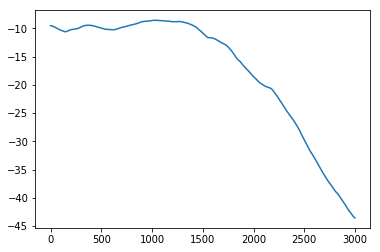

In [6]:
%matplotlib inline
plt.plot(rewards_history)

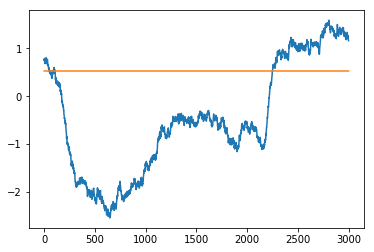

In [9]:
plt.plot(np.array(actions_history)[:,0, 0])
plt.plot(range(len(actions_history)), np.tile(mask[0], 3000))

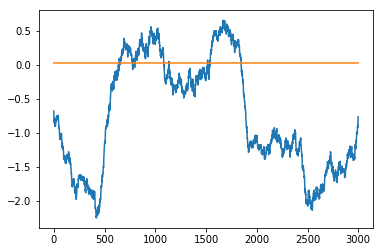

In [10]:
plt.plot(np.array(actions_history)[:,0, 1])
plt.plot(range(len(actions_history)), np.tile(mask[1], 3000))

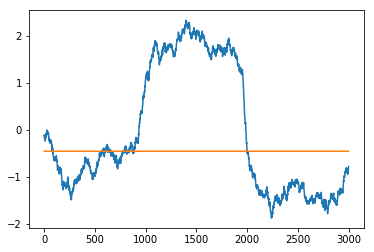

In [11]:
plt.plot(np.array(actions_history)[:,0, 2])
plt.plot(range(len(actions_history)), np.tile(mask[2], 3000))